# data cleaning

In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/weather-data/weather_data.csv")
df

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269


In [3]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


In [4]:
df.dtypes

date                object
avg_temperature    float64
humidity           float64
avg_wind_speed     float64
rain_or_not         object
cloud_cover        float64
pressure           float64
dtype: object

In [5]:
duplicates = df[df.duplicated()]
duplicates

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure


In [6]:
df.isnull().sum()

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [7]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  296 non-null    float64       
 2   humidity         296 non-null    float64       
 3   avg_wind_speed   296 non-null    float64       
 4   rain_or_not      311 non-null    object        
 5   cloud_cover      296 non-null    float64       
 6   pressure         311 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 17.1+ KB
None


In [8]:
# Encode 'rain_or_not' column (1 for Rain, 0 for No Rain)
df['rain_or_not'] = df['rain_or_not'].map({'Rain': 1, 'No Rain': 0})
df.head()


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331


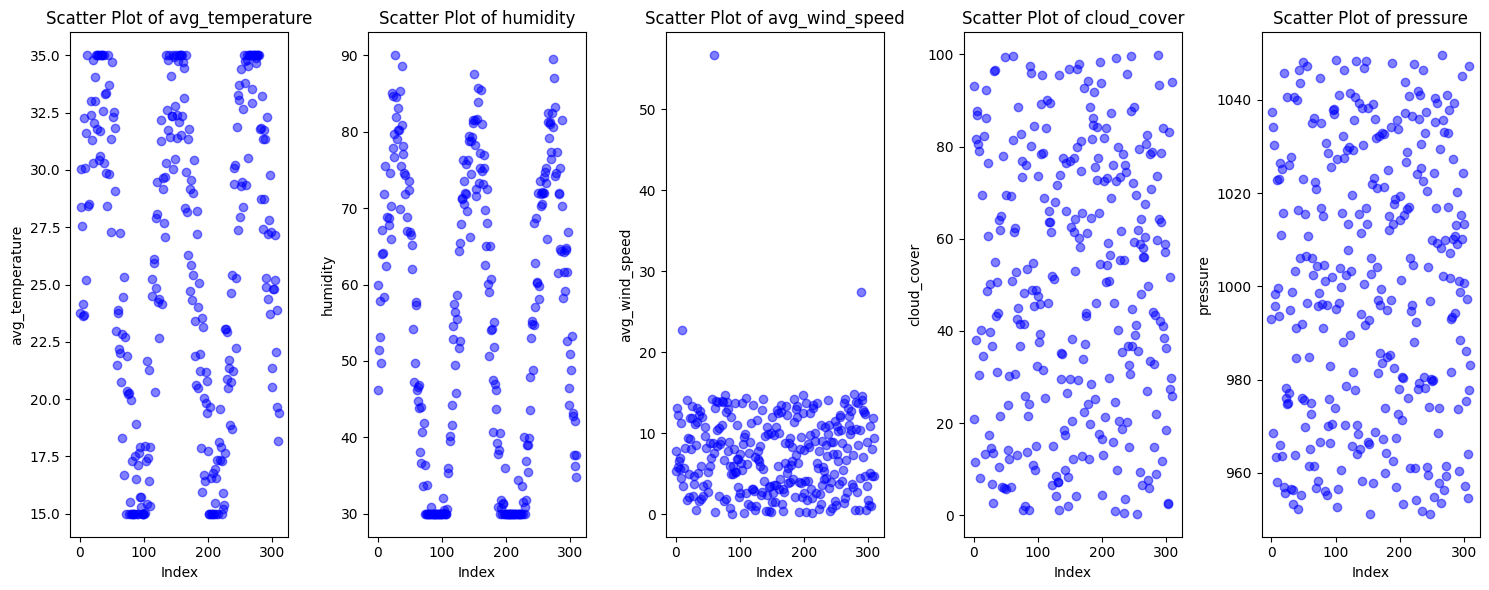

In [9]:
import matplotlib.pyplot as plt

# List of numerical columns
num_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

# Create scatter plots for each numerical feature
plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    plt.scatter(df.index, df[col], alpha=0.5, color='blue')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter Plot of {col}')
plt.tight_layout()
plt.show()


In [10]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in each numerical column
for col in ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in avg_temperature: 0
Outliers in humidity: 0
Outliers in avg_wind_speed: 3
Outliers in cloud_cover: 0
Outliers in pressure: 0


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

In [11]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)  # Cap the outliers
    return df

# Cap outliers in each numerical column
for col in ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']:
    df = cap_outliers_iqr(df, col)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/co

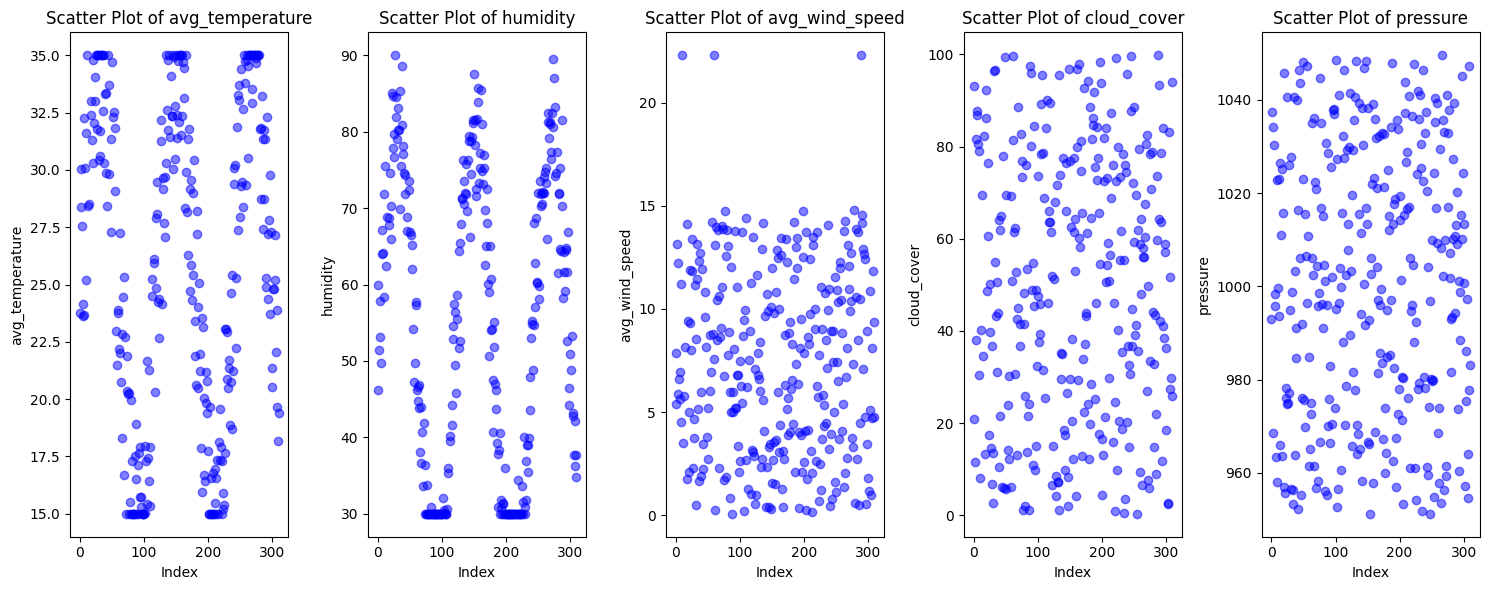

In [12]:
import matplotlib.pyplot as plt

# List of numerical columns
num_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

# Create scatter plots for each numerical feature
plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    plt.scatter(df.index, df[col], alpha=0.5, color='blue')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter Plot of {col}')
plt.tight_layout()
plt.show()


In [12]:
# #filling missing values.
# df.interpolate(method='linear', inplace=True)

In [13]:
#filling missing values.
df['avg_temperature'].fillna(df['avg_temperature'].mean(), inplace=True)
df['humidity'].fillna(df['humidity'].mean(), inplace=True)
df['avg_wind_speed'].fillna(df['avg_wind_speed'].mean(), inplace=True)
df['cloud_cover'].fillna(df['cloud_cover'].mean(), inplace=True)


<ipython-input-13-64e21675bfc1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_temperature'].fillna(df['avg_temperature'].mean(), inplace=True)
<ipython-input-13-64e21675bfc1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [14]:
df.isnull().sum()

date               0
avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
dtype: int64

                      date  avg_temperature    humidity  avg_wind_speed  \
count                  311       311.000000  311.000000      311.000000   
mean   2023-06-05 00:00:00        25.983840   55.041385        7.421611   
min    2023-01-01 00:00:00        15.000000   30.000000        0.069480   
25%    2023-03-19 12:00:00        20.493383   35.686194        3.711684   
50%    2023-06-05 00:00:00        25.983840   55.041385        7.421611   
75%    2023-08-21 12:00:00        31.858688   71.978037       10.897166   
max    2023-11-07 00:00:00        35.000000   90.000000       22.301037   
std                    NaN         6.635859   18.749365        4.413109   

       rain_or_not  cloud_cover     pressure  
count   311.000000   311.000000   311.000000  
mean      0.636656    49.834827  1001.059119  
min       0.000000     0.321826   951.240404  
25%       0.000000    25.955498   975.757545  
50%       1.000000    49.834827  1001.938586  
75%       1.000000    74.162107  1026.5788

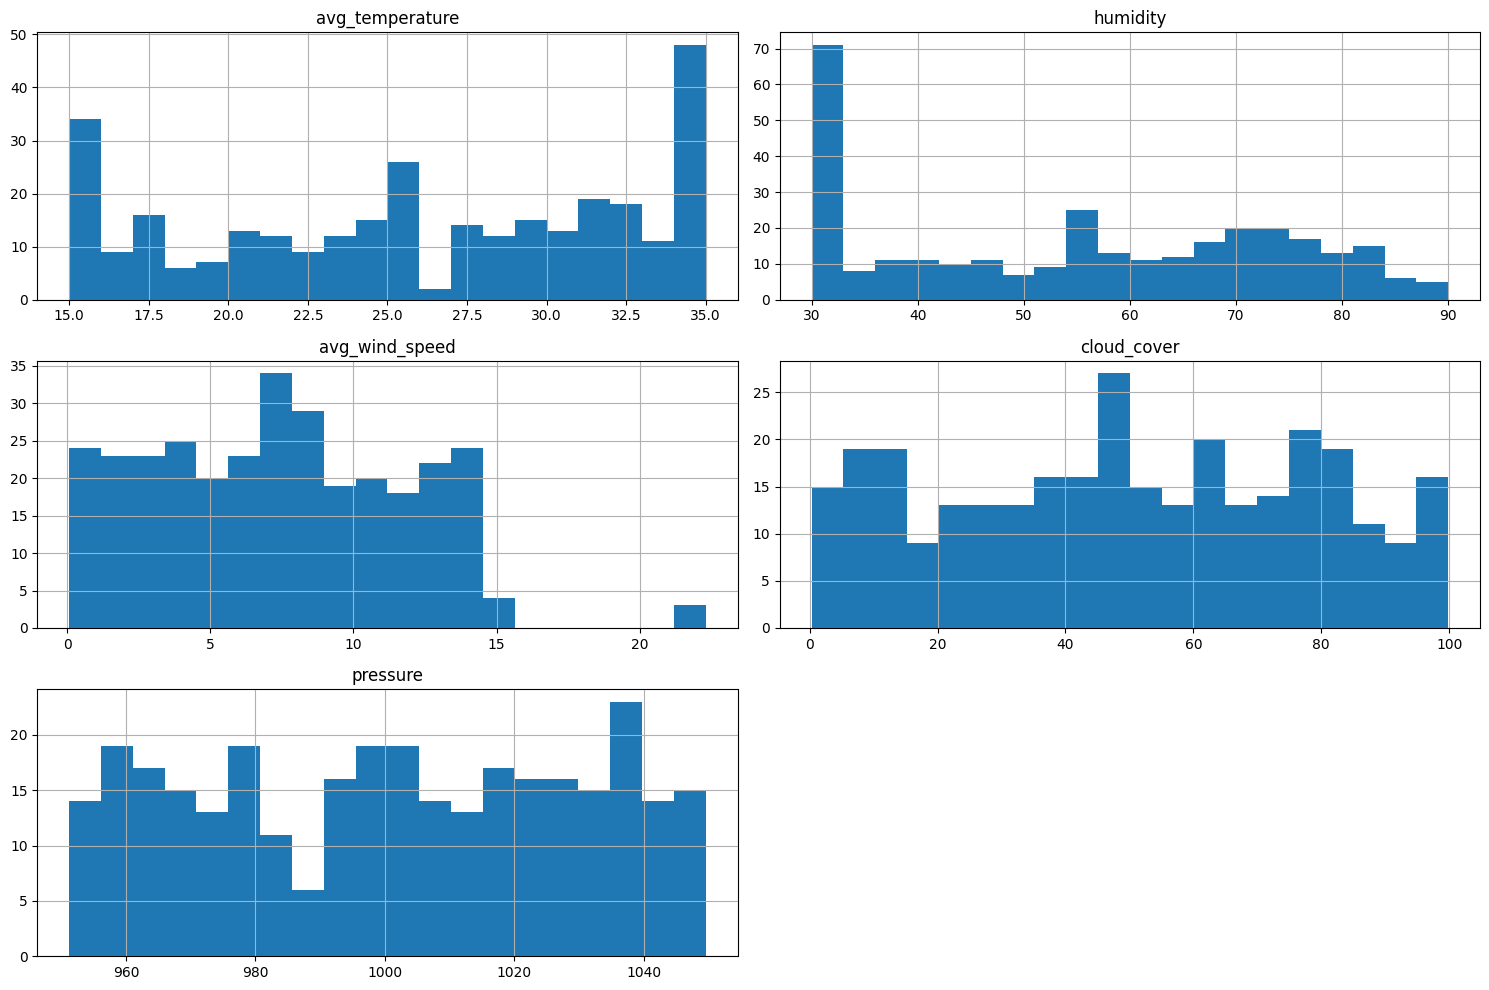

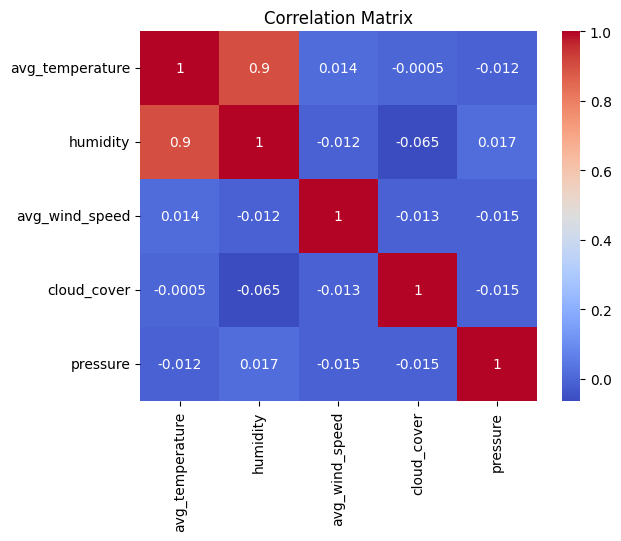

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

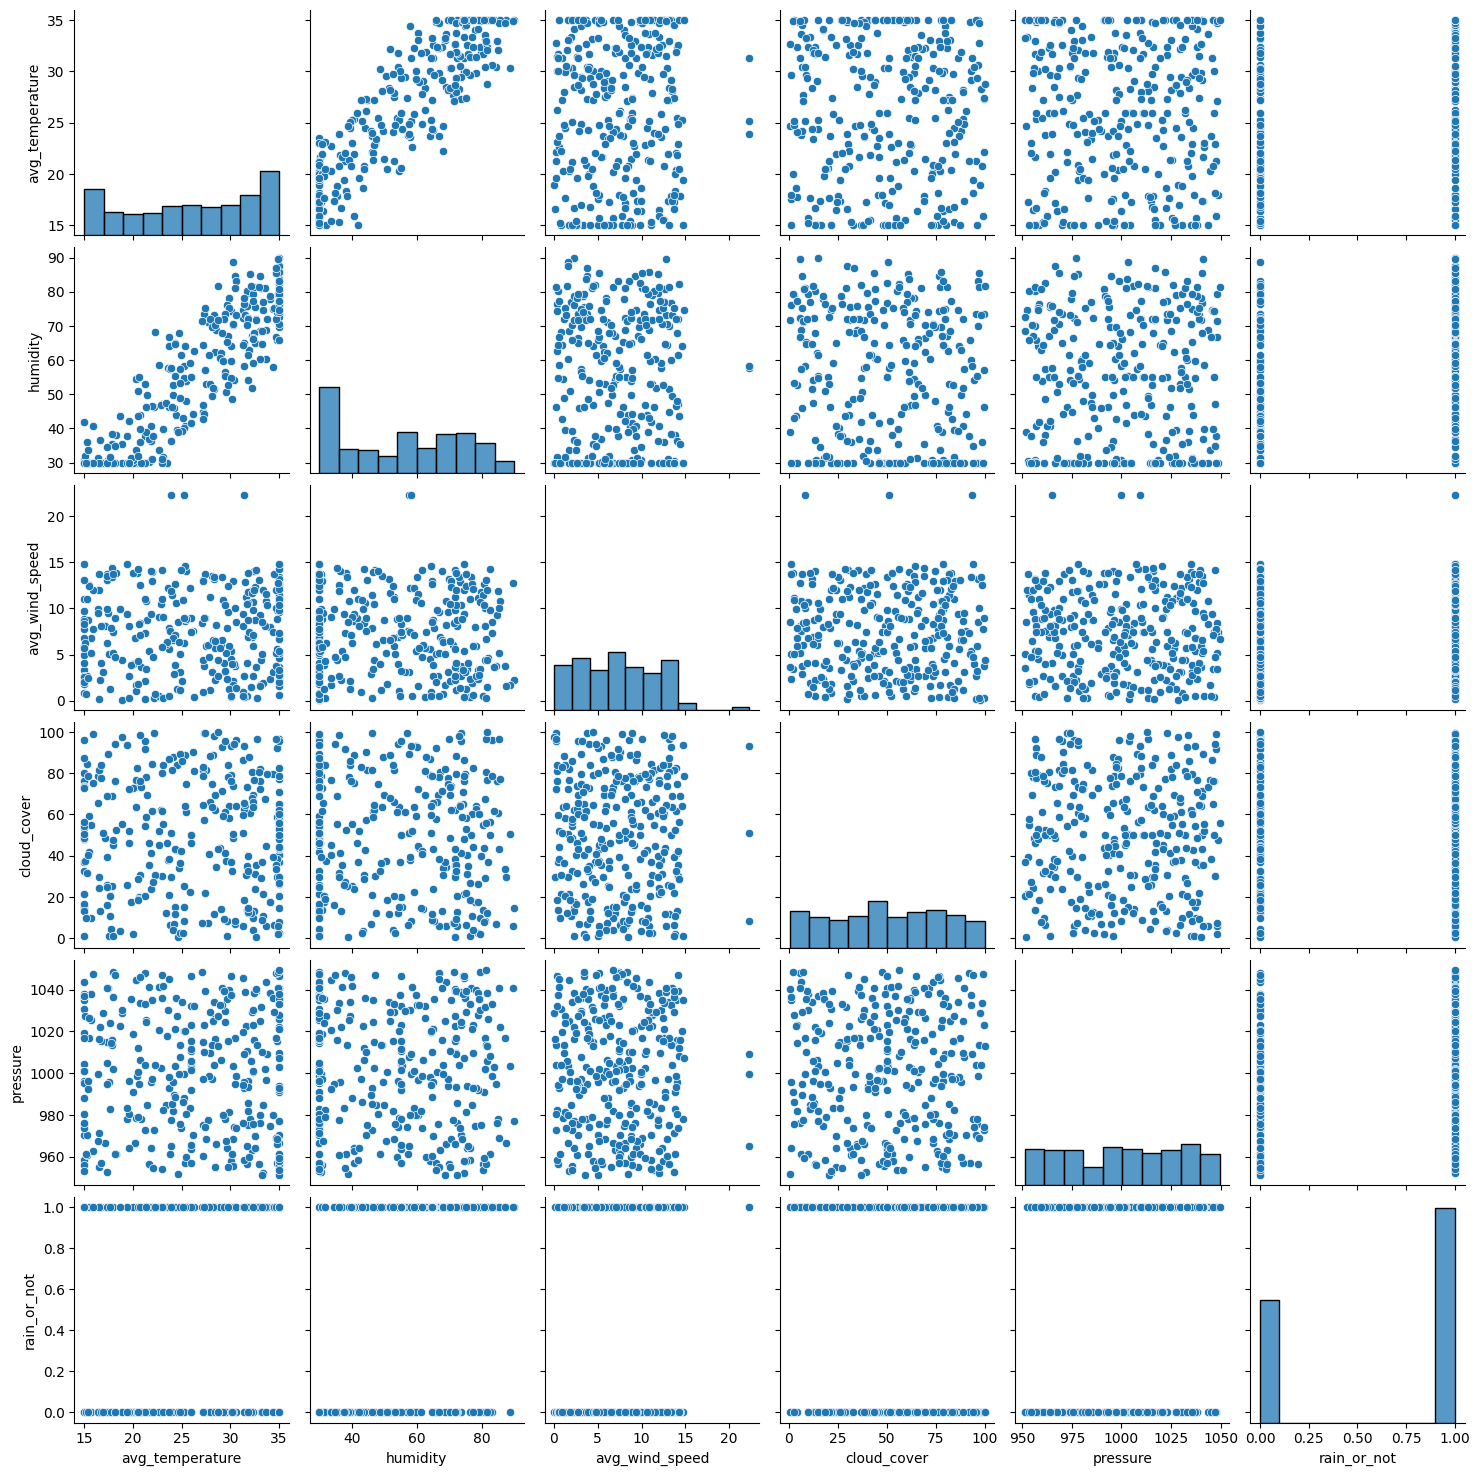

avg_temperature    0.294948
humidity           0.321914
avg_wind_speed     0.126648
cloud_cover       -0.034121
pressure           0.090059
rain_or_not        1.000000
Name: rain_or_not, dtype: float64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume your dataframe is `df` and the target variable is 'target_variable'
num_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

# 1. Summary Statistics
print(df.describe())
print(df.isnull().sum())

# 2. Univariate Analysis (Distribution of numerical features)
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# 3. Correlation Matrix
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Pair Plot (Scatterplot matrix)
sns.pairplot(df[num_cols + ['rain_or_not']])
plt.show()

# 5. Correlation with target variable
print(df[num_cols + ['rain_or_not']].corr()['rain_or_not'])


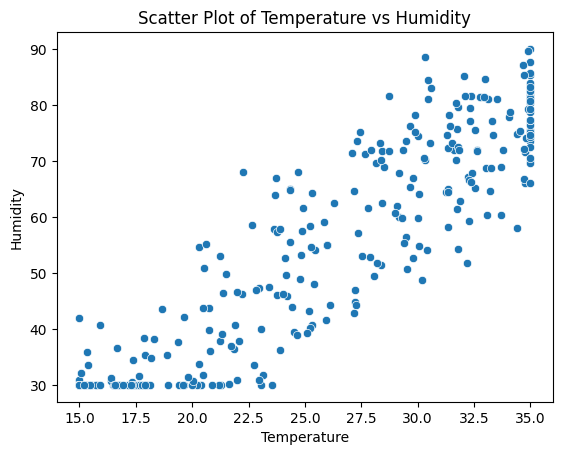

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['avg_temperature'], y=df['humidity'])
plt.title("Scatter Plot of Temperature vs Humidity")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.show()


In [17]:
# Calculate Dew Point using a simplified formula (basic approximation)
# Dew Point formula (Approximation): T_dew = T - ((100 - RH) / 5)
# where T is temperature (in Celsius) and RH is relative humidity (%)
df['dew_point'] = df['avg_temperature'] - ((100 - df['humidity']) / 5)


In [18]:
df

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,dew_point
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681,12.973582
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025,22.005820
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357,18.658148
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142,18.171689
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331,15.204540
...,...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,0,27.307081,954.564875,9.624216
307,2023-11-04,19.645885,42.190604,8.092369,0,51.807877,964.002410,8.084006
308,2023-11-05,23.884496,36.205508,11.860847,1,29.872557,977.681431,11.125597
309,2023-11-06,18.168418,34.785000,4.781288,0,94.067925,1047.153269,5.125417


                      date  avg_temperature    humidity  avg_wind_speed  \
count                  311       311.000000  311.000000      311.000000   
mean   2023-06-05 00:00:00        25.983840   55.041385        7.421611   
min    2023-01-01 00:00:00        15.000000   30.000000        0.069480   
25%    2023-03-19 12:00:00        20.493383   35.686194        3.711684   
50%    2023-06-05 00:00:00        25.983840   55.041385        7.421611   
75%    2023-08-21 12:00:00        31.858688   71.978037       10.897166   
max    2023-11-07 00:00:00        35.000000   90.000000       22.301037   
std                    NaN         6.635859   18.749365        4.413109   

       rain_or_not  cloud_cover     pressure   dew_point  
count   311.000000   311.000000   311.000000  311.000000  
mean      0.636656    49.834827  1001.059119   16.992117  
min       0.000000     0.321826   951.240404    1.000000  
25%       0.000000    25.955498   975.757545    7.325863  
50%       1.000000    49.8348

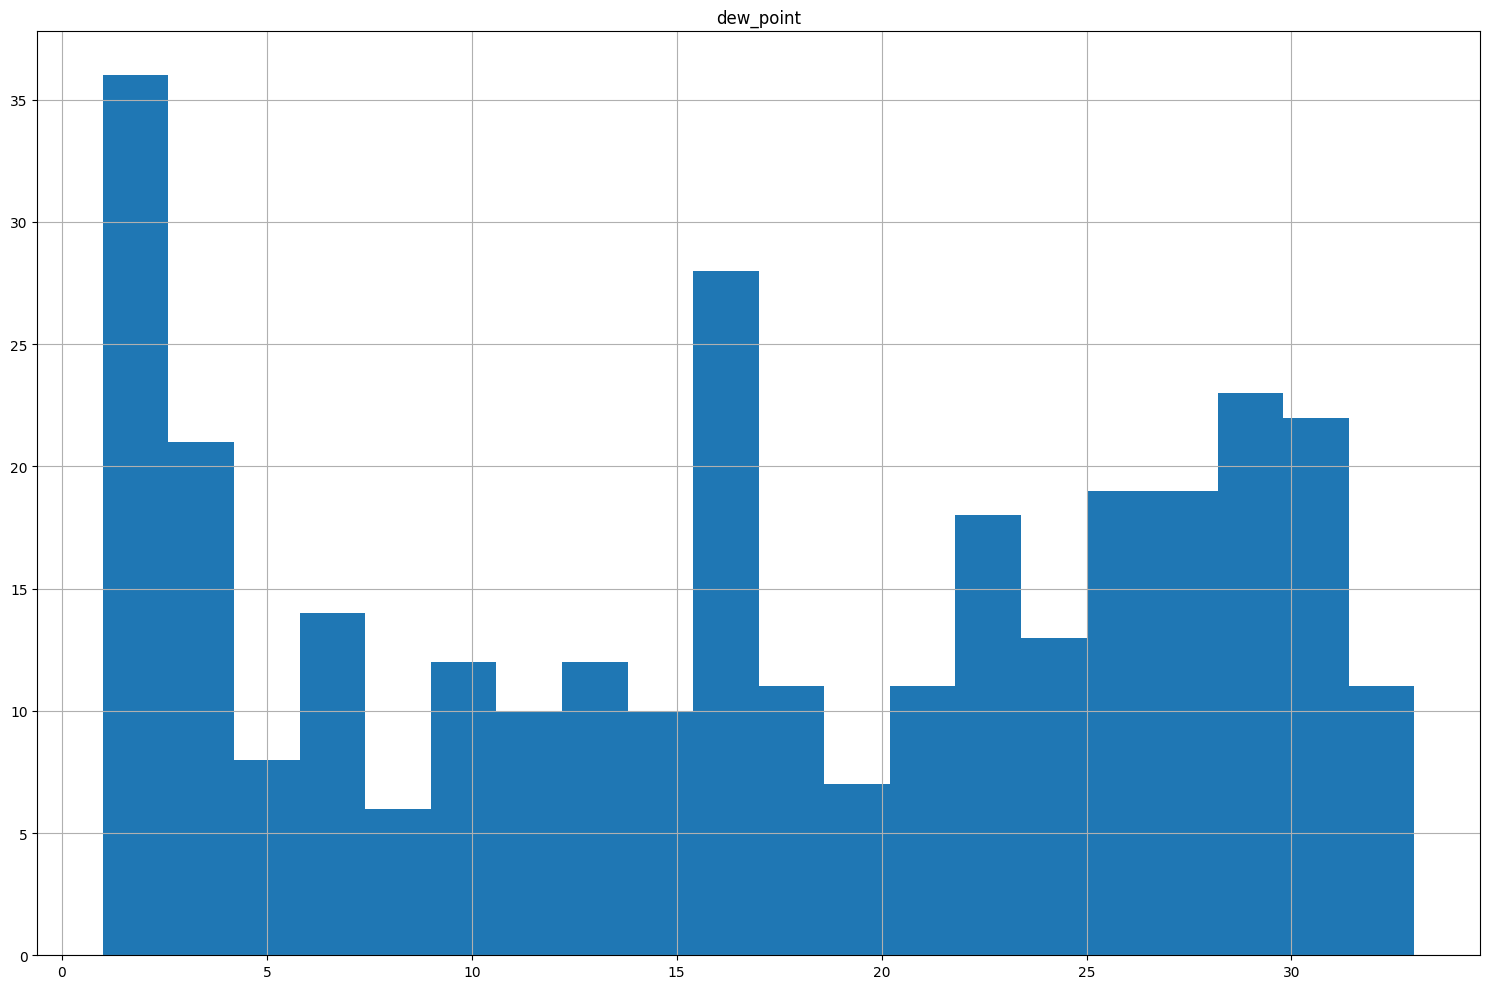

dew_point      0.311815
rain_or_not    1.000000
Name: rain_or_not, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume your dataframe is `df` and the target variable is 'target_variable'
num_cols = [ 'dew_point']

# 1. Summary Statistics
print(df.describe())
print(df.isnull().sum())

# 2. Univariate Analysis (Distribution of numerical features)
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# 5. Correlation with target variable
print(df[num_cols + ['rain_or_not']].corr()['rain_or_not'])


In [20]:
print(df['rain_or_not'].value_counts())


rain_or_not
1    198
0    113
Name: count, dtype: int64


# Modle Evaluation

In [21]:
# Extract the date column (excluding the last 21 rows)
new_df = df.iloc[:-21]


# Display the first few rows of new_df
new_df


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,dew_point
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681,12.973582
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025,22.005820
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357,18.658148
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142,18.171689
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331,15.204540
...,...,...,...,...,...,...,...,...
285,2023-10-13,27.430491,75.201885,13.732324,1,22.061195,1039.252329,22.470868
286,2023-10-14,31.347286,64.378210,0.509190,1,59.822529,994.338001,24.222928
287,2023-10-15,31.719650,70.218325,10.461304,1,73.566311,1010.708958,25.763315
288,2023-10-16,28.743265,81.552445,4.460235,0,99.834751,1013.130755,25.053754


In [26]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Function to train XGBoost with cross-validation
def train_xgboost(df, feature):
    data = df[['date', feature]].copy()
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')
    data['time_index'] = range(len(data))
    
    X, y = data[['time_index']], data[feature]
    
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    
    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    print(f'Cross-validation scores: {scores}')
    print(f'Average MSE: {-np.mean(scores)}')
    
    model.fit(X, y)
    
    future_dates = pd.date_range(start=df['date'].max(), periods=22, freq='D')[1:]
    future_X = pd.DataFrame({'time_index': range(len(X), len(X) + 21)})
    forecast = model.predict(future_X)
    
    predictions = pd.DataFrame({'date': future_dates, feature: forecast})
    return predictions

# Predict features using XGBoost with cross-validation
predicted_temp = train_xgboost(new_df, 'avg_temperature')
predicted_humidity = train_xgboost(new_df, 'humidity')
predicted_wind = train_xgboost(new_df, 'avg_wind_speed')
predicted_cloud_cover = train_xgboost(new_df, 'cloud_cover')
predicted_pressure = train_xgboost(new_df, 'pressure')

# Calculate dew point
predicted_dew_point = predicted_temp.copy()
predicted_dew_point['dew_point'] = predicted_temp['avg_temperature'] - ((100 - predicted_humidity['humidity']) / 5)

# Merge predictions
future_df = (
    predicted_temp
    .merge(predicted_humidity, on='date')
    .merge(predicted_wind, on='date')
    .merge(predicted_cloud_cover, on='date')
    .merge(predicted_pressure, on='date')
    .merge(predicted_dew_point[['date', 'dew_point']], on='date')
)

future_df


Cross-validation scores: [-12.62359883 -12.1601983  -11.91969192 -14.29648413 -13.3078798 ]
Average MSE: 12.861570593301261
Cross-validation scores: [-56.26084906 -51.8679443  -63.14915162 -60.25295295 -64.79189421]
Average MSE: 59.26455842964439
Cross-validation scores: [-31.53604706 -35.52191079 -31.27826984 -36.94679665 -37.00835276]
Average MSE: 34.45827541809151
Cross-validation scores: [-1237.12246369  -825.22601911 -1618.21250618 -1298.38083437
 -1560.00270206]
Average MSE: 1307.7889050822346
Cross-validation scores: [-1725.56185842 -1351.8029767  -1663.10931325 -1351.81225407
 -1742.0211667 ]
Average MSE: 1566.8615138247626


,date,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,dew_point
0,2023-10-18,30.603104,69.924927,12.33172,88.04493,1011.116516,24.588089
1,2023-10-19,30.603104,69.924927,12.33172,88.04493,1011.116516,24.588089
2,2023-10-20,30.603104,69.924927,12.33172,88.04493,1011.116516,24.588089
3,2023-10-21,30.603104,69.924927,12.33172,88.04493,1011.116516,24.588089
4,2023-10-22,30.603104,69.924927,12.33172,88.04493,1011.116516,24.588089
5,2023-10-23,30.603104,69.924927,12.33172,88.04493,1011.116516,24.588089
6,2023-10-24,30.603104,69.924927,12.33172,88.04493,1011.116516,24.588089
7,2023-10-25,30.603104,69.924927,12.33172,88.04493,1011.116516,24.588089
8,2023-10-26,30.603104,69.924927,12.33172,88.04493,1011.116516,24.588089
9,2023-10-27,30.603104,69.924927,12.33172,88.04493,1011.116516,24.588089


ADF Statistic: -13.825260651418317, p-value: 7.770778173370741e-26


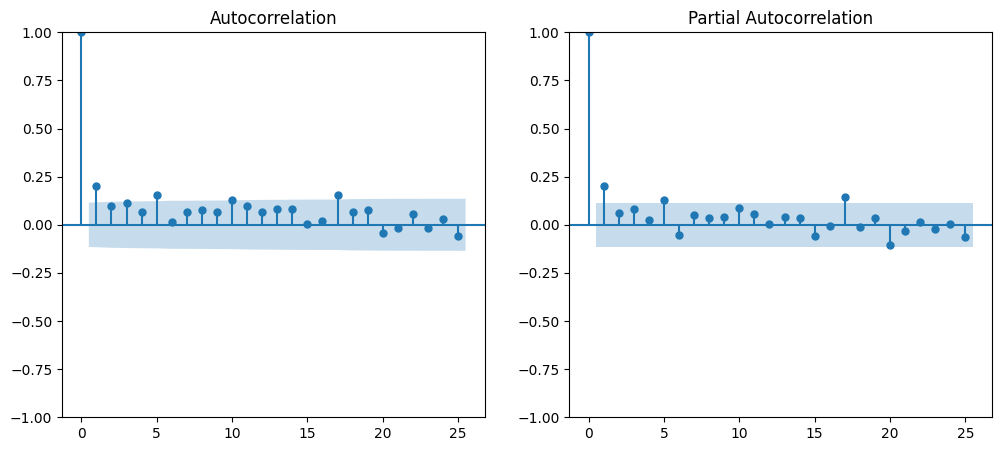

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Raw SARIMA Forecast Values:
 290    0.510247
291    0.400472
292    0.405314
293    0.440248
294    0.432461
295    0.329418
296    0.502131
297    0.477113
298    0.402059
299    0.403351
300    0.445277
301    0.432708
302    0.308881
303    0.498829
304    0.472120
305    0.396260
306    0.397635
307    0.439398
308    0.426940
309    0.303596
310    0.493143
Name: predicted_mean, dtype: float64
SARIMA Model Accuracy: 47.62%
          Date  Actual_Rain  Forecasted_Rain_SARIMA
290 2023-10-18            1                       0
291 2023-10-19            1                       0
292 2023-10-20            1                       0
293 2023-10-21            0                       0
294 2023-10-22            1                       0
295 2023-10-23            1                       0
296 2023-10-24            1                       0
297 2023-10-25            0                       0
298 2023-10-26            1                       0
299 2023-10-27            1                     

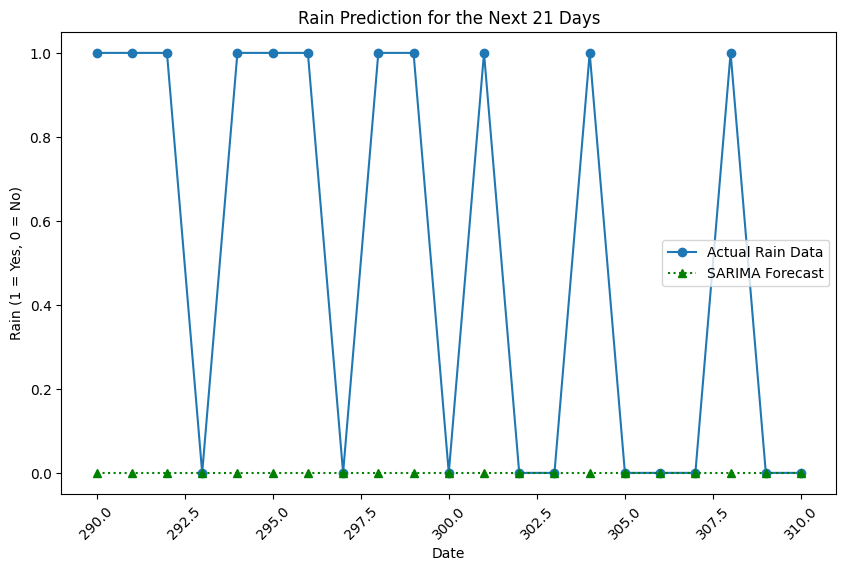

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import accuracy_score

# Sort the dataset by date to ensure chronological order
df = df.sort_values(by='date')

# Extract the target variable (binary: 1 = rain, 0 = no rain)
target = df['rain_or_not']

# Define  exogenous variables 
train_exog =  new_df[['avg_temperature', 'humidity','pressure','dew_point','avg_wind_speed']]
test_exog =  future_df[['avg_temperature', 'humidity','pressure','dew_point','avg_wind_speed']]

# Split into train (all except last 21 days) and test (last 21 days)
train_target = target[:-21]
test_target = target[-21:]


### **1️⃣ Stationarity Check & Differencing**
adf_result = adfuller(train_target)
print(f"ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}")

# If p-value > 0.05, the data is non-stationary, so apply differencing
if adf_result[1] > 0.05:
    train_target = train_target.diff().dropna()  # First-order differencing

# **Plot ACF & PACF to determine SARIMA parameters**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(train_target, ax=plt.gca())
plt.subplot(1, 2, 2)
plot_pacf(train_target, ax=plt.gca())
plt.show()

# **Choose SARIMA order (p, d, q) based on ACF/PACF**
p, d, q = 1, 1, 1 
seasonal_order = (1, 1, 1, 7)  

### **2️⃣ SARIMAX Model (with Exogenous Variables)**
sarima_model = SARIMAX(train_target, order=(p, d, q), seasonal_order=seasonal_order, exog=train_exog)
sarima_model_fit = sarima_model.fit()

# Forecast with SARIMAX (including exogenous variables for the next 21 days)
forecast_sarima = sarima_model_fit.forecast(steps=21, exog=test_exog, dynamic=True)

# Print raw SARIMA forecast values
print("Raw SARIMA Forecast Values:\n", forecast_sarima)

threshold = train_target.mean()
binary_forecast_sarima = (forecast_sarima > threshold).astype(int)

### **3️⃣ Accuracy Evaluation**
# Ensure `test_target` values are binary before calculating accuracy
test_binary = test_target.astype(int)

# Compute accuracy score for SARIMAX
accuracy_sarima = accuracy_score(test_binary, binary_forecast_sarima)
print(f"SARIMA Model Accuracy: {accuracy_sarima * 100:.2f}%")

### **4️⃣ Forecast DataFrame with Dates**
forecast_dates = df['date'].iloc[-21:]  # Extract the last 21 dates

forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Actual_Rain': test_binary.values,
    'Forecasted_Rain_SARIMA': binary_forecast_sarima
})

print(forecast_df)

### **5️⃣ Plot Forecast vs Actual Data**
plt.figure(figsize=(10, 6))
plt.plot(test_binary.index, test_binary.values, label='Actual Rain Data', marker='o')
plt.plot(test_binary.index, binary_forecast_sarima, label='SARIMA Forecast', marker='^', linestyle='dotted', color='green')
plt.legend()
plt.title('Rain Prediction for the Next 21 Days')
plt.xlabel('Date')
plt.ylabel('Rain (1 = Yes, 0 = No)')
plt.xticks(rotation=45)
plt.show()


# Forecast

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error

# Function to train XGBoost with cross-validation
def train_xgboost(df, feature, n_splits=5):
    data = df[['date', feature]].copy()
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')
    data['time_index'] = range(len(data))

    X, y = data[['time_index']], data[feature]

    # Time Series Cross-Validation
    tscv = TimeSeriesSplit(n_splits=n_splits)
    rmse_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        rmse = mean_squared_error(y_test, predictions, squared=False)
        rmse_scores.append(rmse)

    # Train final model on the full dataset
    final_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    final_model.fit(X, y)

    # Forecast future values
    future_dates = pd.date_range(start=df['date'].max(), periods=22, freq='D')[1:]
    future_X = pd.DataFrame({'time_index': range(len(X), len(X) + 21)})
    forecast = final_model.predict(future_X)

    predictions = pd.DataFrame({'date': future_dates, feature: forecast})

    print(f"Cross-Validation RMSE for {feature}: {np.mean(rmse_scores):.4f}")
    return predictions

# Predict features using XGBoost with cross-validation
predicted_temp = train_xgboost(df, 'avg_temperature')
predicted_humidity = train_xgboost(df, 'humidity')
predicted_wind = train_xgboost(df, 'avg_wind_speed')
predicted_cloud_cover = train_xgboost(df, 'cloud_cover')
predicted_pressure = train_xgboost(df, 'pressure')

# Calculate dew point
predicted_dew_point = predicted_temp.copy()
predicted_dew_point['dew_point'] = predicted_temp['avg_temperature'] - ((100 - predicted_humidity['humidity']) / 5)

# Merge predictions
future_df = (
    predicted_temp
    .merge(predicted_humidity, on='date')
    .merge(predicted_wind, on='date')
    .merge(predicted_cloud_cover, on='date')
    .merge(predicted_pressure, on='date')
    .merge(predicted_dew_point[['date', 'dew_point']], on='date')
)

future_df


Cross-Validation RMSE for avg_temperature: 11.0545
Cross-Validation RMSE for humidity: 27.4690
Cross-Validation RMSE for avg_wind_speed: 4.9637
Cross-Validation RMSE for cloud_cover: 38.8283
Cross-Validation RMSE for pressure: 38.1935


,date,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,dew_point
0,2023-11-08,20.495741,36.30978,8.67747,49.904507,1002.181458,7.757697
1,2023-11-09,20.495741,36.30978,8.67747,49.904507,1002.181458,7.757697
2,2023-11-10,20.495741,36.30978,8.67747,49.904507,1002.181458,7.757697
3,2023-11-11,20.495741,36.30978,8.67747,49.904507,1002.181458,7.757697
4,2023-11-12,20.495741,36.30978,8.67747,49.904507,1002.181458,7.757697
5,2023-11-13,20.495741,36.30978,8.67747,49.904507,1002.181458,7.757697
6,2023-11-14,20.495741,36.30978,8.67747,49.904507,1002.181458,7.757697
7,2023-11-15,20.495741,36.30978,8.67747,49.904507,1002.181458,7.757697
8,2023-11-16,20.495741,36.30978,8.67747,49.904507,1002.181458,7.757697
9,2023-11-17,20.495741,36.30978,8.67747,49.904507,1002.181458,7.757697


ADF Statistic: -5.649021551342454, p-value: 9.95918316086427e-07


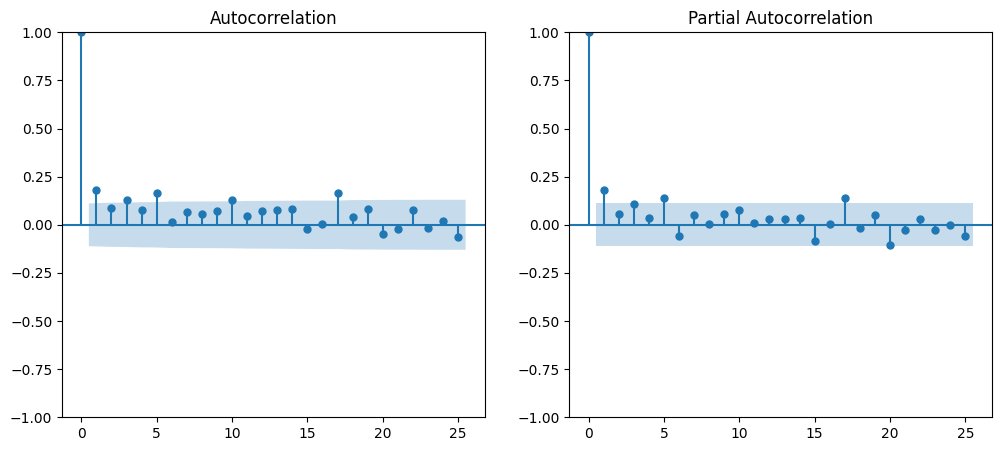

Raw SARIMA Forecast Values:
 311    0.406035
312    0.337735
313    0.356107
314    0.321040
315    0.479792
316    0.233134
317    0.394006
318    0.415773
319    0.359687
320    0.368982
321    0.338137
322    0.432586
323    0.242757
324    0.418442
325    0.409249
326    0.354164
327    0.362715
328    0.332216
329    0.421401
330    0.236224
331    0.413122
Name: predicted_mean, dtype: float64
          Date  Forecasted_Rain_SARIMA
311 2023-11-08                       0
312 2023-11-09                       0
313 2023-11-10                       0
314 2023-11-11                       0
315 2023-11-12                       0
316 2023-11-13                       0
317 2023-11-14                       0
318 2023-11-15                       0
319 2023-11-16                       0
320 2023-11-17                       0
321 2023-11-18                       0
322 2023-11-19                       0
323 2023-11-20                       0
324 2023-11-21                       0
325 2023-11-2

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import accuracy_score

# Ensure date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort dataset by date
df = df.sort_values(by='date')

# Extract target variable (binary: 1 = rain, 0 = no rain)
target = df['rain_or_not']

# Define exogenous variables 
train_exog = df[['avg_temperature', 'humidity', 'pressure', 'dew_point', 'avg_wind_speed']]

# Ensure `future_df` exists before using it
if 'future_df' in globals():
    test_exog = future_df[['avg_temperature', 'humidity', 'pressure', 'dew_point', 'avg_wind_speed']]
else:
    raise ValueError("Error: `future_df` is not defined.")

### **1️⃣ Stationarity Check & Differencing**
adf_result = adfuller(target)
print(f"ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}")

# If p-value > 0.05, the data is non-stationary, so apply differencing
if adf_result[1] > 0.05:
    target = target.diff().dropna()  # First-order differencing

# **Plot ACF & PACF to determine SARIMA parameters**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(target.dropna(), ax=plt.gca())  # Drop NaNs after differencing
plt.subplot(1, 2, 2)
plot_pacf(target.dropna(), ax=plt.gca())
plt.show()

# Set SARIMA parameters
p, d, q = 1, 1, 1
seasonal_order = (1, 1, 1, 7)

### **2️⃣ SARIMAX Model (with Exogenous Variables)**
sarima_model = SARIMAX(target, order=(p, d, q), seasonal_order=seasonal_order, exog=train_exog)
sarima_model_fit = sarima_model.fit()

# Forecast with SARIMAX (including exogenous variables for the next 21 days)
forecast_sarima = sarima_model_fit.forecast(steps=21, exog=test_exog)

# Print raw SARIMA forecast values
print("Raw SARIMA Forecast Values:\n", forecast_sarima)

# **3️⃣ Convert Forecast to Binary (Rain/No Rain)**
threshold = target.mean()
binary_forecast_sarima = (forecast_sarima > threshold).astype(int)

### **4️⃣ Forecast DataFrame with Dates**
last_date = df['date'].iloc[-1]  # Get the last date in the DataFrame
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=21)

forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Rain_SARIMA': binary_forecast_sarima
})

print(forecast_df)
